# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
!pip install citipy

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
# Create empty columns to hold information

df = pd.DataFrame(cities)
df.rename(columns={0 : 'City'}, inplace=True)
df["Lat"] = ""
df["Lng"] = ""
df["Max Temp"] = ""
df["Humidity"] = ""
df["Cloudiness"] = ""
df["Wind Speed"] = ""
df["Country"] = ""
df["Date"] = ""

df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hoi an,,,,,,,,
1,ubinskoye,,,,,,,,
2,paamiut,,,,,,,,
3,umzimvubu,,,,,,,,
4,norman wells,,,,,,,,


In [29]:
# Populate df by using .iterrows()
city_num = 1

print("Beginning Data Retrieval ")
print("--------------------------")

for index, row in df.iterrows():
    base_url = f"https://api.openweathermap.org/data/2.5/weather?q={row['City']}&appid={weather_api_key}&units=imperial"
    query_data = requests.get(base_url).json()
    
    try:
        print(f"Processing record {city_num} out of {len(cities)} | {row['City']} | {query_data['main']['temp']}")
        
        df.loc[index, 'Lat'] = query_data['coord']['lat']
        df.loc[index, 'Lng'] = query_data['coord']['lon']
        df.loc[index, 'Max Temp'] = query_data['main']['temp_max']
        df.loc[index, 'Humidity'] = query_data['main']['humidity']
        df.loc[index, 'Cloudiness'] = query_data['clouds']['all']
        df.loc[index, 'Wind Speed'] = query_data['wind']['speed']
        df.loc[index, 'Country'] = query_data['sys']['country']
        df.loc[index, 'Date'] = query_data['dt']
        
        city_num += 1     
    except:
        print("City not found. Skipping...")

print("--------------------------")
print("Beginning Data Retrieval ")
print("--------------------------")

Beginning Data Retrieval 
--------------------------
Processing record 1 out of 620 | hoi an | 94.96
Processing record 2 out of 620 | ubinskoye | 61.97
Processing record 3 out of 620 | paamiut | 45.23
City not found. Skipping...
Processing record 4 out of 620 | norman wells | 55.27
City not found. Skipping...
Processing record 5 out of 620 | punta arenas | 41.11
Processing record 6 out of 620 | kapaa | 79.65
Processing record 7 out of 620 | hokitika | 50.76
Processing record 8 out of 620 | honiara | 81.27
Processing record 9 out of 620 | albany | 59.9
City not found. Skipping...
Processing record 10 out of 620 | boca do acre | 71.1
Processing record 11 out of 620 | rikitea | 70.16
Processing record 12 out of 620 | walvis bay | 60.1
Processing record 13 out of 620 | ushuaia | 40.66
Processing record 14 out of 620 | sola | 77.52
Processing record 15 out of 620 | tezu | 90.14
Processing record 16 out of 620 | dikson | 45.54
Processing record 17 out of 620 | vaini | 73.56
Processing record

Processing record 152 out of 620 | las rosas | 45.75
Processing record 153 out of 620 | manokwari | 82.24
Processing record 154 out of 620 | keti bandar | 81.99
Processing record 155 out of 620 | bardiyah | 80.89
Processing record 156 out of 620 | tiksi | 45.07
Processing record 157 out of 620 | bathsheba | 81.21
Processing record 158 out of 620 | tual | 80.76
Processing record 159 out of 620 | itaituba | 78.24
Processing record 160 out of 620 | shache | 80.04
City not found. Skipping...
Processing record 161 out of 620 | birjand | 76.12
Processing record 162 out of 620 | san juan de la maguana | 75.07
Processing record 163 out of 620 | viedma | 47.66
Processing record 164 out of 620 | sisimiut | 47.66
Processing record 165 out of 620 | ankpa | 70.09
Processing record 166 out of 620 | inyonga | 60.71
Processing record 167 out of 620 | esik | 80.02
Processing record 168 out of 620 | emba | 88.48
Processing record 169 out of 620 | maniitsoq | 43.7
Processing record 170 out of 620 | bengk

Processing record 305 out of 620 | san patricio | 82.06
Processing record 306 out of 620 | vao | 68.97
Processing record 307 out of 620 | calabozo | 70.75
Processing record 308 out of 620 | arlit | 94.41
Processing record 309 out of 620 | sorland | 52.34
Processing record 310 out of 620 | omsukchan | 36.01
Processing record 311 out of 620 | qaqortoq | 45.1
Processing record 312 out of 620 | sembakung | 84.13
Processing record 313 out of 620 | palasa | 87.28
Processing record 314 out of 620 | manuk mangkaw | 84.67
Processing record 315 out of 620 | salvador | 70.2
Processing record 316 out of 620 | careiro da varzea | 81.21
Processing record 317 out of 620 | lavrentiya | 48.02
Processing record 318 out of 620 | ulaangom | 74.95
Processing record 319 out of 620 | kenai | 59.56
Processing record 320 out of 620 | anchorage | 63.81
Processing record 321 out of 620 | belen | 73.54
Processing record 322 out of 620 | lata | 62.98
Processing record 323 out of 620 | whitecourt | 69.51
Processing

Processing record 456 out of 620 | bolshaya glushitsa | 68.63
Processing record 457 out of 620 | pokrovsk | 62.8
Processing record 458 out of 620 | two hills | 71.01
Processing record 459 out of 620 | ulagan | 70.02
Processing record 460 out of 620 | hulyaypole | 64.38
Processing record 461 out of 620 | muros | 65.07
City not found. Skipping...
Processing record 462 out of 620 | balgazyn | 75.63
Processing record 463 out of 620 | kharan | 87.1
Processing record 464 out of 620 | saint-pierre | 64.65
Processing record 465 out of 620 | ongandjera | 55.02
Processing record 466 out of 620 | baykit | 76.1
Processing record 467 out of 620 | makat | 90.3
Processing record 468 out of 620 | tura | 79.47
Processing record 469 out of 620 | matagami | 46.45
Processing record 470 out of 620 | ulan-ude | 66.09
Processing record 471 out of 620 | kinablangan | 86.88
Processing record 472 out of 620 | puerto maldonado | 67.69
Processing record 473 out of 620 | bosansko grahovo | 62.64
Processing record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
#Drop empty cells
weather_df = df.dropna()
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hoi an,15.8794,108.335,94.96,59.0,100,12.21,VN,1628046480
1,ubinskoye,55.3068,79.6802,61.97,79.0,96,4.43,RU,1628046480
2,paamiut,61.994,-49.6678,45.23,95.0,100,5.17,GL,1628046481
4,norman wells,65.282,-126.8329,55.27,76.0,100,2.33,CA,1628046481
6,punta arenas,-53.15,-70.9167,42.12,75.0,90,9.22,CL,1628046482
...,...,...,...,...,...,...,...,...,...
615,sakaiminato,35.55,133.2333,94.93,64.0,67,7.99,JP,1628046683
616,huarmey,-10.0681,-78.1522,64.71,86.0,1,9.35,PE,1628046684
617,wagar,16.1525,36.2032,76.3,74.0,81,9.98,SD,1628046684
618,lodwar,3.1191,35.5973,77.38,50.0,18,17.92,KE,1628046684


In [34]:
weather_df.to_csv('weather_data.csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [40]:
df['Humidity'] = df['Humidity'].replace('', np.nan)

# Check the humidity percentage
clean_weather_df = weather_df[(weather_df["Humidity"] <= 100)]
clean_weather_df = clean_weather_df.reset_index(drop=True)
clean_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hoi an,15.8794,108.335,94.96,59.0,100,12.21,VN,1628046480
1,ubinskoye,55.3068,79.6802,61.97,79.0,96,4.43,RU,1628046480
2,paamiut,61.994,-49.6678,45.23,95.0,100,5.17,GL,1628046481
3,norman wells,65.282,-126.8329,55.27,76.0,100,2.33,CA,1628046481
4,punta arenas,-53.15,-70.9167,42.12,75.0,90,9.22,CL,1628046482
...,...,...,...,...,...,...,...,...,...
568,sakaiminato,35.55,133.2333,94.93,64.0,67,7.99,JP,1628046683
569,huarmey,-10.0681,-78.1522,64.71,86.0,1,9.35,PE,1628046684
570,wagar,16.1525,36.2032,76.3,74.0,81,9.98,SD,1628046684
571,lodwar,3.1191,35.5973,77.38,50.0,18,17.92,KE,1628046684


In [44]:
#  Get the indices of cities that have humidity over 100%.
print('No cities has the humidity value that is greater than 100%.')

No cities has the humidity value that is greater than 100%.


In [45]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

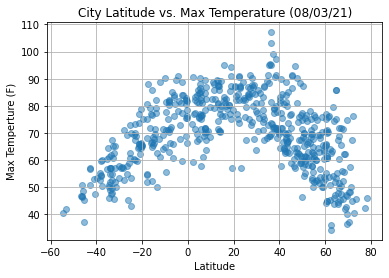

In [47]:
plt.scatter(clean_weather_df['Lat'], clean_weather_df['Max Temp'], 
            alpha=.5)
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperture (F)")
plt.grid()
plt.savefig("Lat_vs_Temp_1.png")

## Latitude vs. Humidity Plot

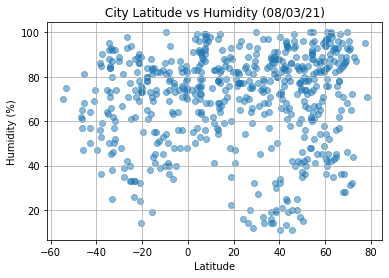

In [48]:
plt.scatter(clean_weather_df['Lat'], clean_weather_df['Humidity'], 
            alpha=.5)
plt.title(f"City Latitude vs Humidity ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Lat_vs_Hum_2.png")

## Latitude vs. Cloudiness Plot

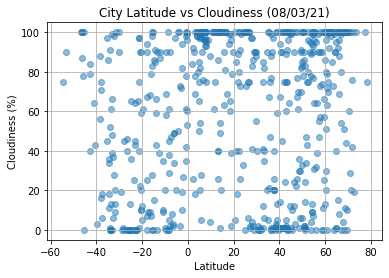

In [49]:
plt.scatter(clean_weather_df['Lat'], clean_weather_df['Cloudiness'], 
            alpha=.5)
plt.title(f"City Latitude vs Cloudiness ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Lat_vs_Cloud_3.png")

## Latitude vs. Wind Speed Plot

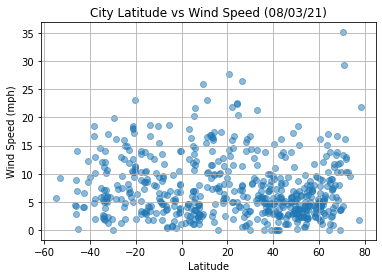

In [50]:
plt.scatter(clean_weather_df['Lat'], clean_weather_df['Wind Speed'], 
            alpha=.5)
plt.title(f"City Latitude vs Wind Speed ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Lat_vs_Wind_4.png")

## Linear Regression

In [68]:
def regress_func(x_axis, y_axis, xlabel, ylabel, fig_name):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_axis, y_axis)
    line = slope*x_axis+intercept
    plt.scatter(x_axis, y_axis, alpha=.5)
    plt.plot(x_axis, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    plt.savefig(fig_name)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

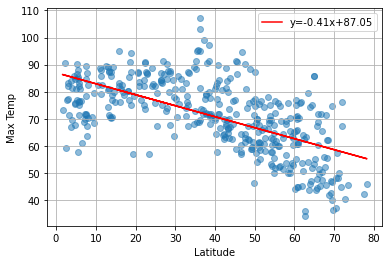

In [70]:
northern_df = (clean_weather_df.loc[clean_weather_df['Lat'] > 0])

regress_func(northern_df['Lat'].astype(float), 
             northern_df['Max Temp'].astype(float), 
             "Latitude",
             "Max Temp", 
             "NH_Lat_vs_Temp_5")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

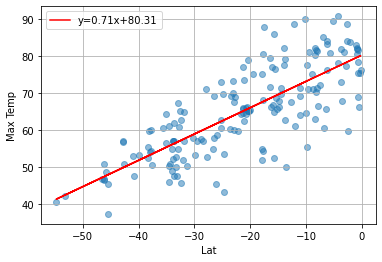

In [71]:
southern_df = (clean_weather_df.loc[clean_weather_df['Lat'] <= 0])
regress_func(southern_df['Lat'].astype(float), 
             southern_df['Max Temp'].astype(float), 
             "Lat",
             "Max Temp", 
             "SH_Lat_vs_Temp_6")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

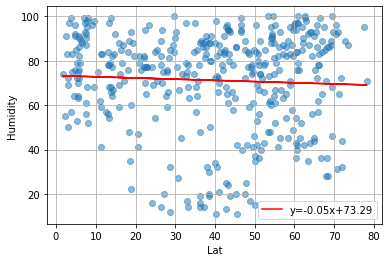

In [72]:
regress_func(northern_df['Lat'].astype(float), 
             northern_df['Humidity'].astype(float), 
             "Lat",
             "Humidity",
             "NH_Lat_vs_Hum_7")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

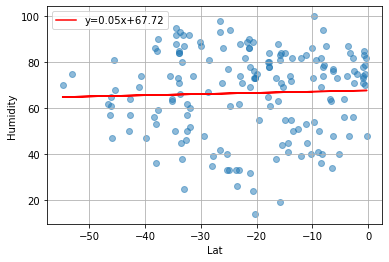

In [73]:
regress_func(southern_df['Lat'].astype(float), 
             southern_df['Humidity'].astype(float), 
             "Lat",
             "Humidity", 
             "SH_Lat_vs_Hum_8")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

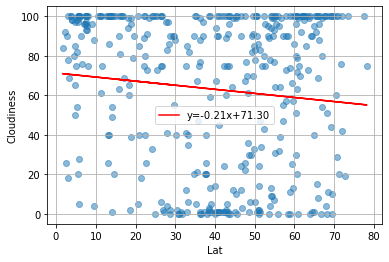

In [80]:
regress_func(northern_df['Lat'].astype(float),
             northern_df['Cloudiness'].astype(float), 
             "Lat",
             "Cloudiness",
             "NH_Lat_vs_Cloud_9")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

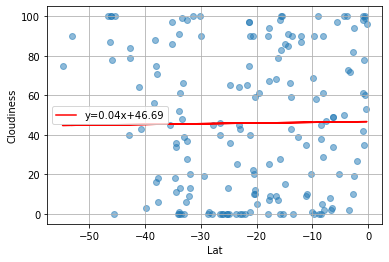

In [76]:
regress_func(southern_df['Lat'].astype(float), 
             southern_df['Cloudiness'].astype(float), 
             "Lat",
             "Cloudiness",
             "SH_Lat_vs_Cloud_10")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

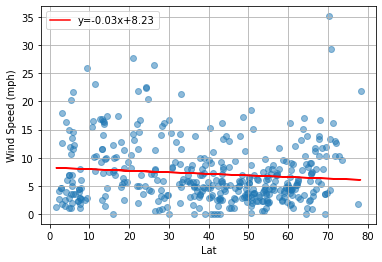

In [78]:
regress_func(northern_df['Lat'].astype(float), 
             northern_df['Wind Speed'].astype(float), 
             "Lat",
             "Wind Speed (mph)", 
             "NH_Lat_vs_Wind_11")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

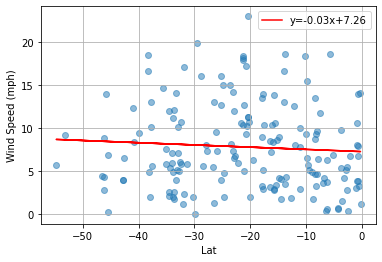

In [79]:
regress_func(southern_df['Lat'].astype(float), 
             southern_df['Wind Speed'].astype(float), 
             "Lat",
             "Wind Speed (mph)", 
             "SH_Lat_vs_Wind_12")